In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import pytz

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

In [2]:
data['date'] = pd.to_datetime(data['date'])

In [3]:
def convert_utc_to_cet(df, date_column='date'):
    """
    Convert UTC timestamps to Central European Time (CET/CEST) with proper DST handling
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the date column
    date_column (str): Name of the column containing UTC timestamps
    
    Returns:
    pd.DataFrame: DataFrame with converted timestamps
    """
    # Make a copy to avoid modifying the original
    df = df.copy()
    
    # Ensure timestamps are UTC aware
    if df[date_column].dt.tz is None:
        df[date_column] = df[date_column].dt.tz_localize('UTC')
    elif df[date_column].dt.tz != pytz.UTC:
        df[date_column] = df[date_column].dt.tz_convert('UTC')
    
    # Convert to CET/CEST (Europe/Berlin includes proper DST handling)
    df[date_column] = df[date_column].dt.tz_convert('Europe/Berlin')
    
    return df


In [4]:
data = convert_utc_to_cet(data)

In [5]:
second_tw_data = data[data['stream']==277]

In [7]:
second_tw_data.tail(10)

,date,user,message,stream
1467227,2025-03-29 04:05:13+01:00,orfy94,have a goodnight,277
1467228,2025-03-29 04:05:15+01:00,goblingoblin05,Bye,277
1467229,2025-03-29 04:05:15+01:00,rodrigo_20771,bye 󠀀,277
1467230,2025-03-29 04:05:15+01:00,CrazeE420xd,gn everyone,277
1467231,2025-03-29 04:05:19+01:00,Randy2D,ye,277
1467232,2025-03-29 04:05:19+01:00,trek44_,bye bye,277
1467233,2025-03-29 04:05:20+01:00,kirill_ugrumov,have a good rest,277
1467234,2025-03-29 04:05:20+01:00,wrinkly_skrawtum3,!play,277
1467235,2025-03-29 04:05:21+01:00,我滴媽,byeeee,277
1467236,2025-03-29 04:05:21+01:00,Martin_Gales,bye bye,277


C:\Users\Kardo\AppData\Local\Temp\ipykernel_2968\1797691730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_tw_data['date'] = pd.to_datetime(second_tw_data['date'])
C:\Users\Kardo\AppData\Local\Temp\ipykernel_2968\1797691730.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  second_tw_data['minute'] = second_tw_data['date'].dt.floor('T')
C:\Users\Kardo\AppData\Local\Temp\ipykernel_2968\1797691730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

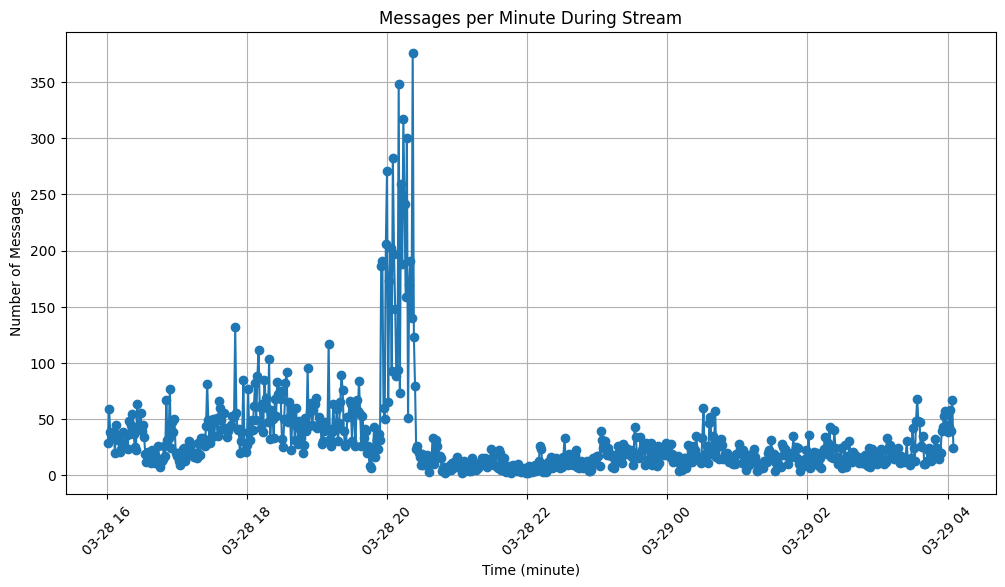

In [8]:
# Ensure 'date' is in datetime format
second_tw_data['date'] = pd.to_datetime(second_tw_data['date'])

# Round to the nearest minute
second_tw_data['minute'] = second_tw_data['date'].dt.floor('T')

# Count messages per minute
messages_per_minute = second_tw_data.groupby('minute').size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(messages_per_minute.index, messages_per_minute.values, marker='o', linestyle='-')

# Labels and title
plt.xlabel('Time (minute)')
plt.ylabel('Number of Messages')
plt.title('Messages per Minute During Stream')
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

C:\Users\Kardo\AppData\Local\Temp\ipykernel_2968\3404268902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_tw_data['date'] = pd.to_datetime(second_tw_data['date'])
C:\Users\Kardo\AppData\Local\Temp\ipykernel_2968\3404268902.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  second_tw_data['minute_5'] = second_tw_data['date'].dt.floor('5T')
C:\Users\Kardo\AppData\Local\Temp\ipykernel_2968\3404268902.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

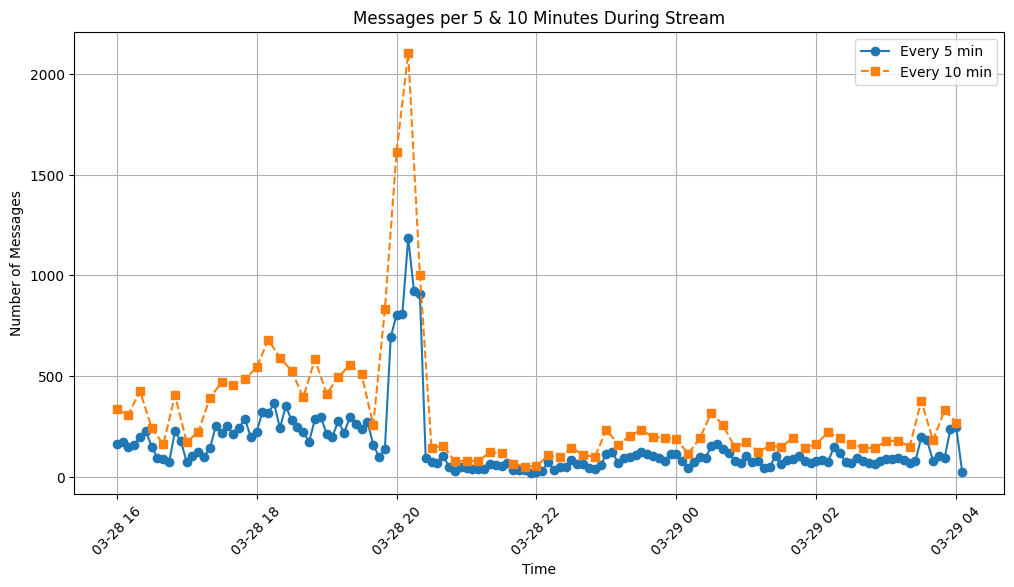

In [9]:
# Ensure 'date' is in datetime format
second_tw_data['date'] = pd.to_datetime(second_tw_data['date'])

# Group by 5-minute intervals
second_tw_data['minute_5'] = second_tw_data['date'].dt.floor('5T')
messages_per_5min = second_tw_data.groupby('minute_5').size()

# Group by 10-minute intervals
second_tw_data['minute_10'] = second_tw_data['date'].dt.floor('10T')
messages_per_10min = second_tw_data.groupby('minute_10').size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(messages_per_5min.index, messages_per_5min.values, marker='o', linestyle='-', label='Every 5 min')
plt.plot(messages_per_10min.index, messages_per_10min.values, marker='s', linestyle='--', label='Every 10 min')

# Labels and title
plt.xlabel('Time')
plt.ylabel('Number of Messages')
plt.title('Messages per 5 & 10 Minutes During Stream')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show plot
plt.show()